# Mean Shift Clustering

Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

### Working

* Define a window (bandwidth of the kernel) and place the window on a data point
* Calculate the mean for all the points in the window
* Move the center of the window to the location of the mean
* Repeat steps 2 and 3 until there is convergence

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('my_machine-learning/datasets/customers.csv')
df.sample(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
127,128,Male,40,71,95
9,10,Female,30,19,72


In [4]:
#X = df.iloc[:, [2,3]].values (2d)
X = df.iloc[:, [2,3,4]].values

In [5]:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans

In [6]:
ms = MeanShift(bandwidth=22)
y_ms = ms.fit_predict(X)

In [7]:
kmean = KMeans(n_clusters=5,)
y_kmeans = kmean.fit_predict(X)

In [8]:
from mpl_toolkits.mplot3d import Axes3D

### Comparison between meanshift and Kmeans

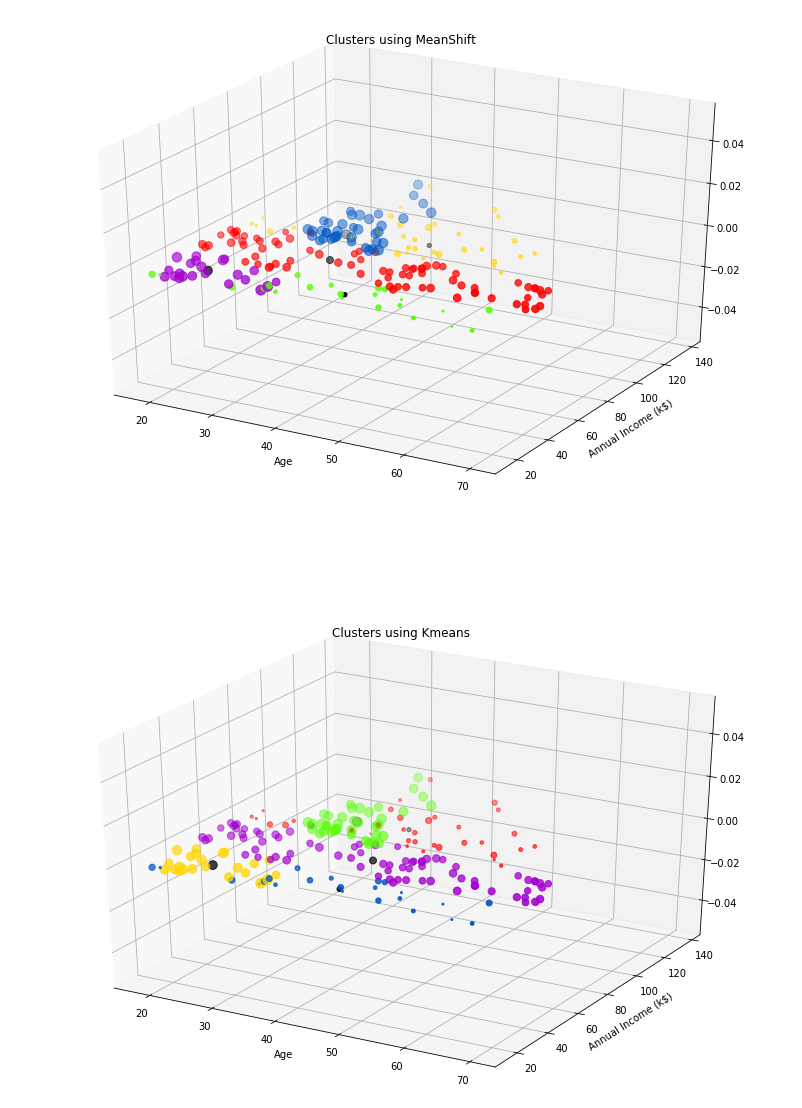

In [9]:
fig = plt.figure(figsize=(14, 20))

#plt.subplot(121) (for 2d)
plt.subplot(211, projection='3d')
plt.scatter(X[:, 0], X[:, 1],X[:,2], c=y_ms, cmap='prism')
centers = ms.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],centers[:,2], c='black')
plt.title('Clusters using MeanShift')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

#plt.subplot(122) (for 2d)
plt.subplot(212, projection='3d')
plt.scatter(X[:, 0], X[:, 1],X[:,2], c=y_kmeans, cmap='prism')
centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], centers[:,2], c='black')
plt.xlabel('Age')
plt.title('Clusters using Kmeans')
plt.ylabel('Annual Income (k$)')
plt.show()

### Disadvantage
<ul><li>computationally expensive 
    <ul><li>
O(T*n*log(n)) in lower dimensions, with n the number of samples and T the number of points<li>
O(T*n^2) in higher dimensions